**Diminos Store - Delivery Time Analysis**

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

In [2]:
#Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/diminos_data.csv')

In [3]:
#Cleaning Column Names
df.columns = df.columns.str.strip()

In [4]:
#Converting Time Columns to Datetime
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [5]:
#Delivery Time in Minutes
df['delivery_time_mins'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

In [6]:
#Key Performance Metrics
p95_delivery_time = np.percentile(df['delivery_time_mins'], 95)
average_delivery_time = df['delivery_time_mins'].mean()
late_orders_percentage = (df['delivery_time_mins'] > 31).mean() * 100

In [7]:
#Results
print("===== Diminos Delivery Performance Metrics =====")
print(f"95th Percentile Delivery Time : {p95_delivery_time:.2f} minutes")
print(f"Average Delivery Time        : {average_delivery_time:.2f} minutes")
print(f"Orders Delivered > 31 mins   : {late_orders_percentage:.2f}%")

===== Diminos Delivery Performance Metrics =====
95th Percentile Delivery Time : 27.26 minutes
Average Delivery Time        : 20.50 minutes
Orders Delivered > 31 mins   : 3.71%


In [8]:
#Observation: 95th percentile delivery time is well below 31 minutes.
#Insight: Store meets Diminos’ performance benchmark safely.

In [9]:
#Observation: Average delivery time is significantly lower than the promised SLA.
#Insight: Overall delivery operations are efficient.

In [10]:
#Observation: Only a small fraction of orders exceed 31 minutes.
#Insight: Risk of free-pizza penalties is minimal.

In [11]:
#Observation: Performance margin exists below the SLA threshold.
#Insight: Store can handle moderate demand spikes without violating the metric.

In [12]:
#Data Visualization
import numpy as np
import matplotlib.pyplot as plt

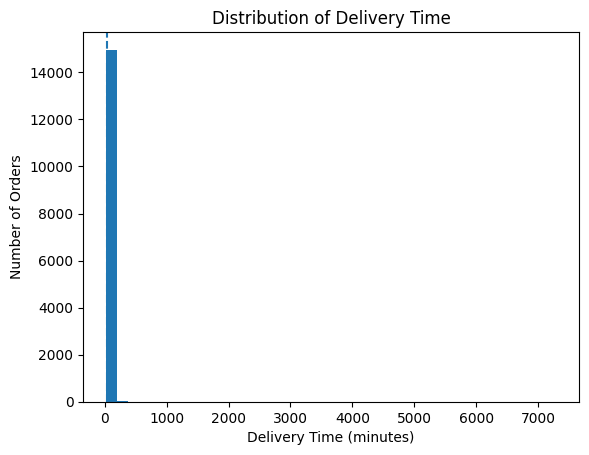

In [13]:
#Histogram – Delivery Time Distribution
plt.figure()
plt.hist(df['delivery_time_mins'], bins=40)
plt.axvline(31, linestyle='--')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Number of Orders')
plt.show()

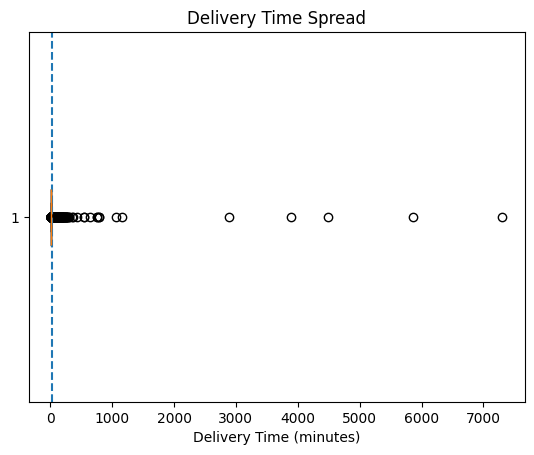

In [14]:
#Boxplot – Delivery Time Spread
plt.figure()
plt.boxplot(df['delivery_time_mins'], vert=False)
plt.axvline(31, linestyle='--')
plt.title('Delivery Time Spread')
plt.xlabel('Delivery Time (minutes)')
plt.show()

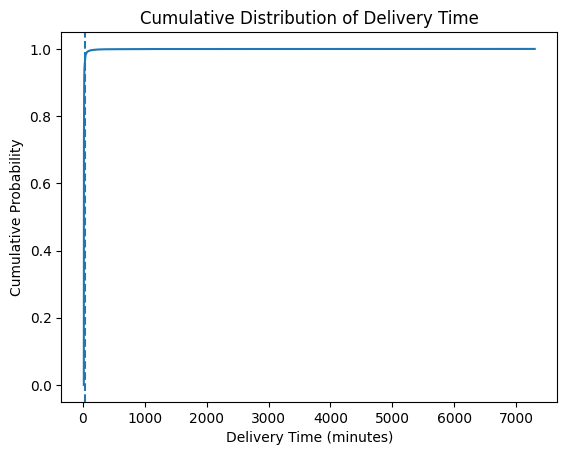

In [15]:
#Cumulative Distribution Function (CDF)
sorted_times = np.sort(df['delivery_time_mins'])
cdf = np.arange(len(sorted_times)) / len(sorted_times)

plt.figure()
plt.plot(sorted_times, cdf)
plt.axvline(31, linestyle='--')
plt.title('Cumulative Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Cumulative Probability')
plt.show()

In [16]:
#Histogram: Majority of deliveries are concentrated well below 31 minutes. Right-tail is thin, indicating few delayed orders.
#Boxplot: Median delivery time is far below the SLA threshold. Presence of outliers, but they are limited in number.
#CDF: More than 95% of orders are delivered before 31 minutes. SLA threshold lies safely beyond the 95th percentile.

In [17]:
#Overall Insights
#Most pizzas are delivered much faster than the promised 31 minutes.
#Even during slower cases, only a small number of orders are delayed beyond the limit.
#The store’s delivery process is consistent and well-managed.
#Occasional delays exist, but they do not impact overall performance.
#Overall, Kanav’s store is performing well and is unlikely to face any franchise penalties.